<a href="https://colab.research.google.com/github/bluecontainer/maddypython/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functions that generate data for analysis in later cells

In [161]:
import numpy as np
import random
import pandas as pd
from functools import partial

def calc_nextvalue(init, a, prevvalue, i):
    if prevvalue == 0:
        prevvalue = init
    r = (random.random()/10) - 0.05
    return (1 + r) * prevvalue + a

def calc_investmentperiod(period):
    months = np.arange(period - 1)
    calc = np.frompyfunc(partial(calc_nextvalue, 1000, 10), 2, 1)
    result = calc.accumulate(months)
    return pd.DataFrame(data=result, columns=['portfoliovalue'])

def get_investmentfirstdoubled(df):
    dfDoubled = df[(df['portfoliovalue'] > 2000)]
    return dfDoubled.index.values[0] if dfDoubled.size > 0 else None

def get_lastinvestmentvalue(df):
    return df.tail(1).values[0][0]

def calc_investmentperiodstats(period, i):
    df = calc_investmentperiod(period)
    periodfirstdoubled = get_investmentfirstdoubled(df)
    lastinvestmentvalue = get_lastinvestmentvalue(df)
    return (periodfirstdoubled, lastinvestmentvalue)

def calc_simulation(period, samples):
    iterations = np.arange(samples)
    data = np.frompyfunc(partial(calc_investmentperiodstats, period), 1, 1)(iterations)
    return pd.DataFrame.from_records(data=data, columns=['firstdoubledperiod', 'finalportfoliovalue'])


This runs the simulation to generate stats of last investment value and first period the investment doubled.

In [162]:
dfSimStats = calc_simulation(120, 250)


Using the generated stats, get the min and max last investment value.

In [163]:
print(dfSimStats['finalportfoliovalue'].max())
print(dfSimStats['finalportfoliovalue'].min())

4115.348416797713
1219.595177225321


<Axes: >

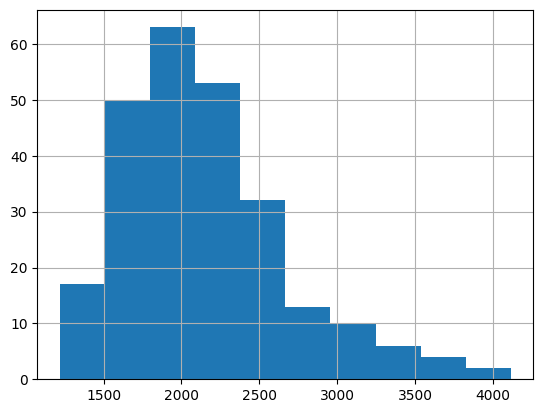

In [164]:
dfSimStats['finalportfoliovalue'].hist()

In [165]:
print(dfSimStats['firstdoubledperiod'].max())
print(dfSimStats['firstdoubledperiod'].min())

116.0
38.0


<Axes: >

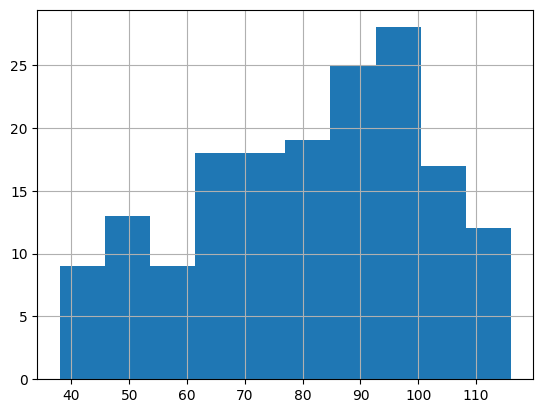

In [166]:
dfSimStats['firstdoubledperiod'].hist()